In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:

data = pd.read_csv("G:\My Drive\Housing.csv")

In [3]:
data


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


In [4]:
data.duplicated().sum()

0

# step 1: Data Understanding¶

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe(include='all')

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
count,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545,5.450000e+02
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3,NaN
top,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished,NaN
freq,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227,NaN
mean,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.740000e+06


In [7]:
data.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [8]:
data.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

C:\Users\Sakil Middya\AppData\Local\Temp\ipykernel_2568\3244632307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


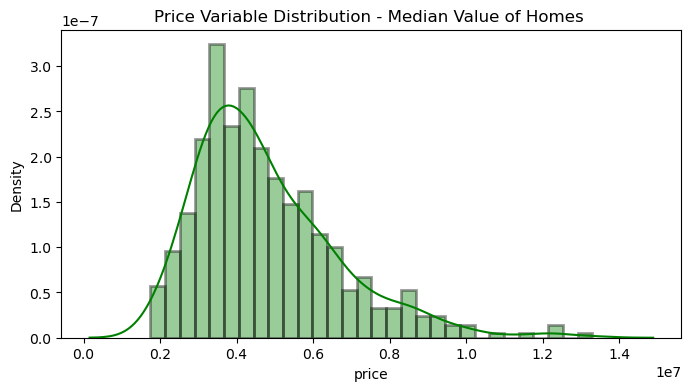

In [9]:
plt.figure(figsize=[8,4])
sns.distplot(data['price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Price Variable Distribution - Median Value of Homes ')
plt.show()

In [10]:
data.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [11]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [12]:
data.shape

(545, 13)

In [13]:
data.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

<Axes: xlabel='area', ylabel='price'>

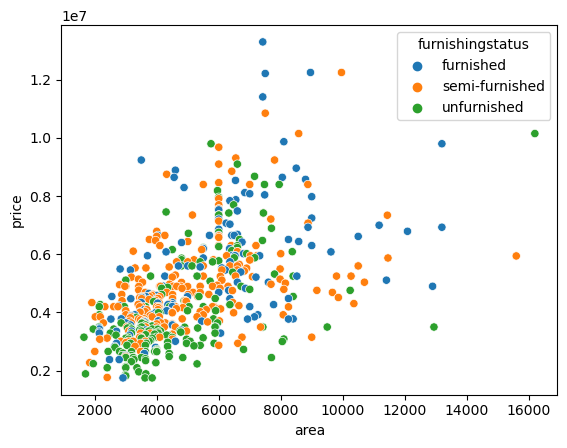

In [14]:
sns.scatterplot(y=data['price'],x=data['area'],hue=data['furnishingstatus'])

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

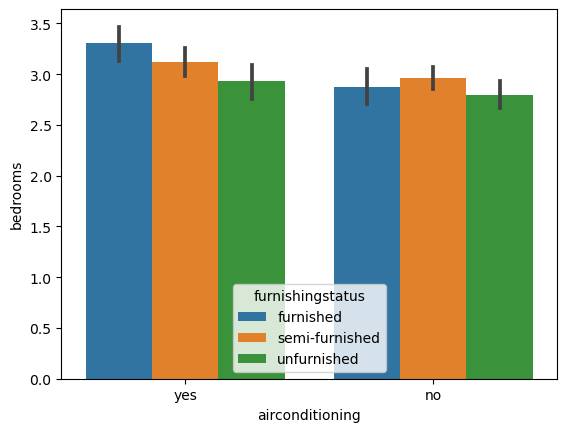

In [15]:
sns.barplot(x=data['airconditioning'],y=data['bedrooms'],hue=data["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

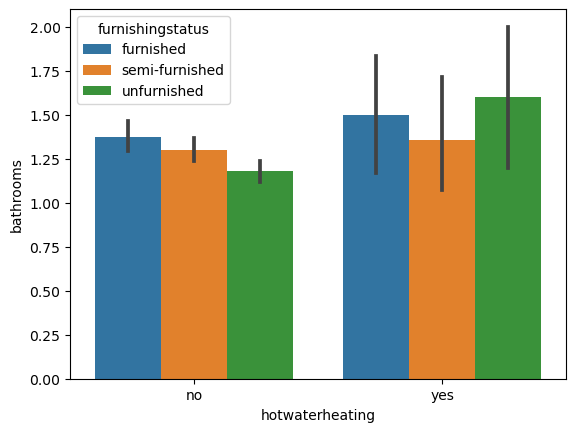

In [16]:
sns.barplot(x=data['hotwaterheating'],y=data['bathrooms'],hue=data["furnishingstatus"])

<Axes: xlabel='furnishingstatus', ylabel='price'>

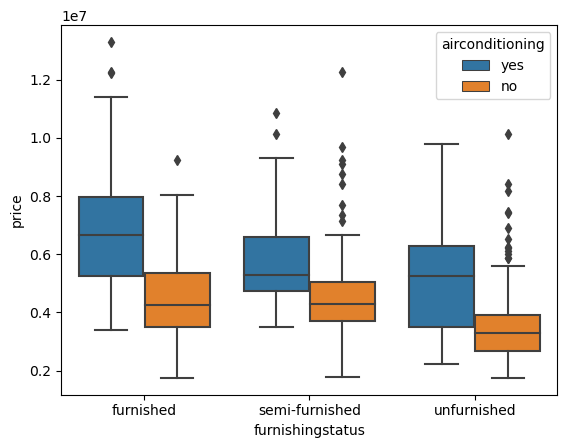

In [17]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)

# Remove outliers

In [18]:
data.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

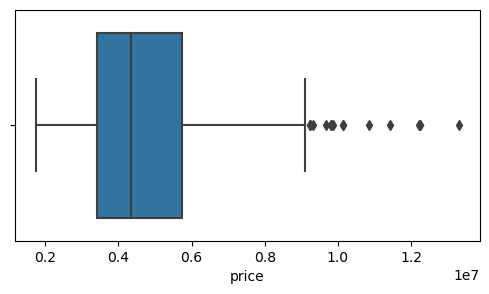

In [19]:
plt.figure(figsize=(6,3))
sns.boxplot(x="price",data=data)
plt.show()

In [20]:
max_threshold = data['price'].mean() + 3 * data['price'].std()
min_threshold = data['price'].mean() - 3 * data['price'].std()

In [21]:
max_threshold, min_threshold

(10378048.094678603, -844589.5992657607)

In [22]:
df = data[(data['price'] > min_threshold) & (data['price'] < max_threshold)]
df.reset_index(drop=True,inplace=True)

In [23]:
df.shape

(539, 13)

In [24]:
data.shape

(545, 13)

In [25]:
data.shape[0] - df.shape[0]

6

In [26]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,10150000
1,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,10150000
2,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,9870000
3,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,9800000
4,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,9800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000
535,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150
536,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000
537,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000


In [27]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,10150000
1,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,10150000
2,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,9870000
3,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,9800000
4,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,9800000


# using get dummies

In [28]:
df1 = pd.get_dummies(data = df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', \
                                            'airconditioning', 'prefarea', 'furnishingstatus'], dtype=int)

In [29]:
df1.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8580,4,3,4,2,10150000,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
1,16200,5,3,2,0,10150000,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
2,8100,4,1,2,2,9870000,0,1,0,1,...,1,1,0,0,1,0,1,1,0,0
3,5750,3,2,4,1,9800000,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,13200,3,1,2,2,9800000,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0


In [30]:
df1.duplicated().sum()

0

In [31]:
df1.corr(numeric_only=True)

,area,bedrooms,bathrooms,stories,parking,price,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.141382,0.168400,0.074650,0.334899,0.529053,-0.286284,0.286284,-0.144755,0.144755,...,0.038259,0.005950,-0.005950,-0.213421,0.213421,-0.224912,0.224912,0.136917,0.006777,-0.133555
bedrooms,0.141382,1.000000,0.372731,0.403735,0.120699,0.358331,0.016464,-0.016464,-0.079691,0.079691,...,0.095209,-0.048740,0.048740,-0.147859,0.147859,-0.073612,0.073612,0.062694,0.059297,-0.120077
bathrooms,0.168400,0.372731,1.000000,0.319048,0.136582,0.491267,-0.034552,0.034552,-0.147203,0.147203,...,0.102262,-0.075645,0.075645,-0.167588,0.167588,-0.045262,0.045262,0.094388,0.032912,-0.121682
stories,0.074650,0.403735,0.319048,1.000000,0.030278,0.433177,-0.120100,0.120100,-0.046222,0.046222,...,-0.169309,-0.020515,0.020515,-0.290050,0.290050,-0.045134,0.045134,0.080340,0.004718,-0.079145
parking,0.334899,0.120699,0.136582,0.030278,1.000000,0.338421,-0.200439,0.200439,-0.041069,0.041069,...,0.040127,-0.074171,0.074171,-0.138503,0.138503,-0.074263,0.074263,0.111806,0.049123,-0.154766
price,0.529053,0.358331,0.491267,0.433177,0.338421,1.000000,-0.307003,0.307003,-0.285290,0.285290,...,0.178554,-0.112677,0.112677,-0.449557,0.449557,-0.316549,0.316549,0.207106,0.080526,-0.275708
mainroad_no,-0.286284,0.016464,-0.034552,-0.120100,-0.200439,-0.307003,1.000000,-1.000000,0.093043,-0.093043,...,-0.041372,-0.010804,0.010804,0.101552,-0.101552,0.197962,-0.197962,-0.127299,-0.012287,0.130451
mainroad_yes,0.286284,-0.016464,0.034552,0.120100,0.200439,0.307003,-1.000000,1.000000,-0.093043,0.093043,...,0.041372,0.010804,-0.010804,-0.101552,0.101552,-0.197962,0.197962,0.127299,0.012287,-0.130451
guestroom_no,-0.144755,-0.079691,-0.147203,-0.046222,-0.041069,-0.285290,0.093043,-0.093043,1.000000,-1.000000,...,-0.373812,-0.010438,0.010438,0.139006,-0.139006,0.171842,-0.171842,-0.097993,-0.009103,0.100046
guestroom_yes,0.144755,0.079691,0.147203,0.046222,0.041069,0.285290,-0.093043,0.093043,-1.000000,1.000000,...,0.373812,0.010438,-0.010438,-0.139006,0.139006,-0.171842,0.171842,0.097993,0.009103,-0.100046


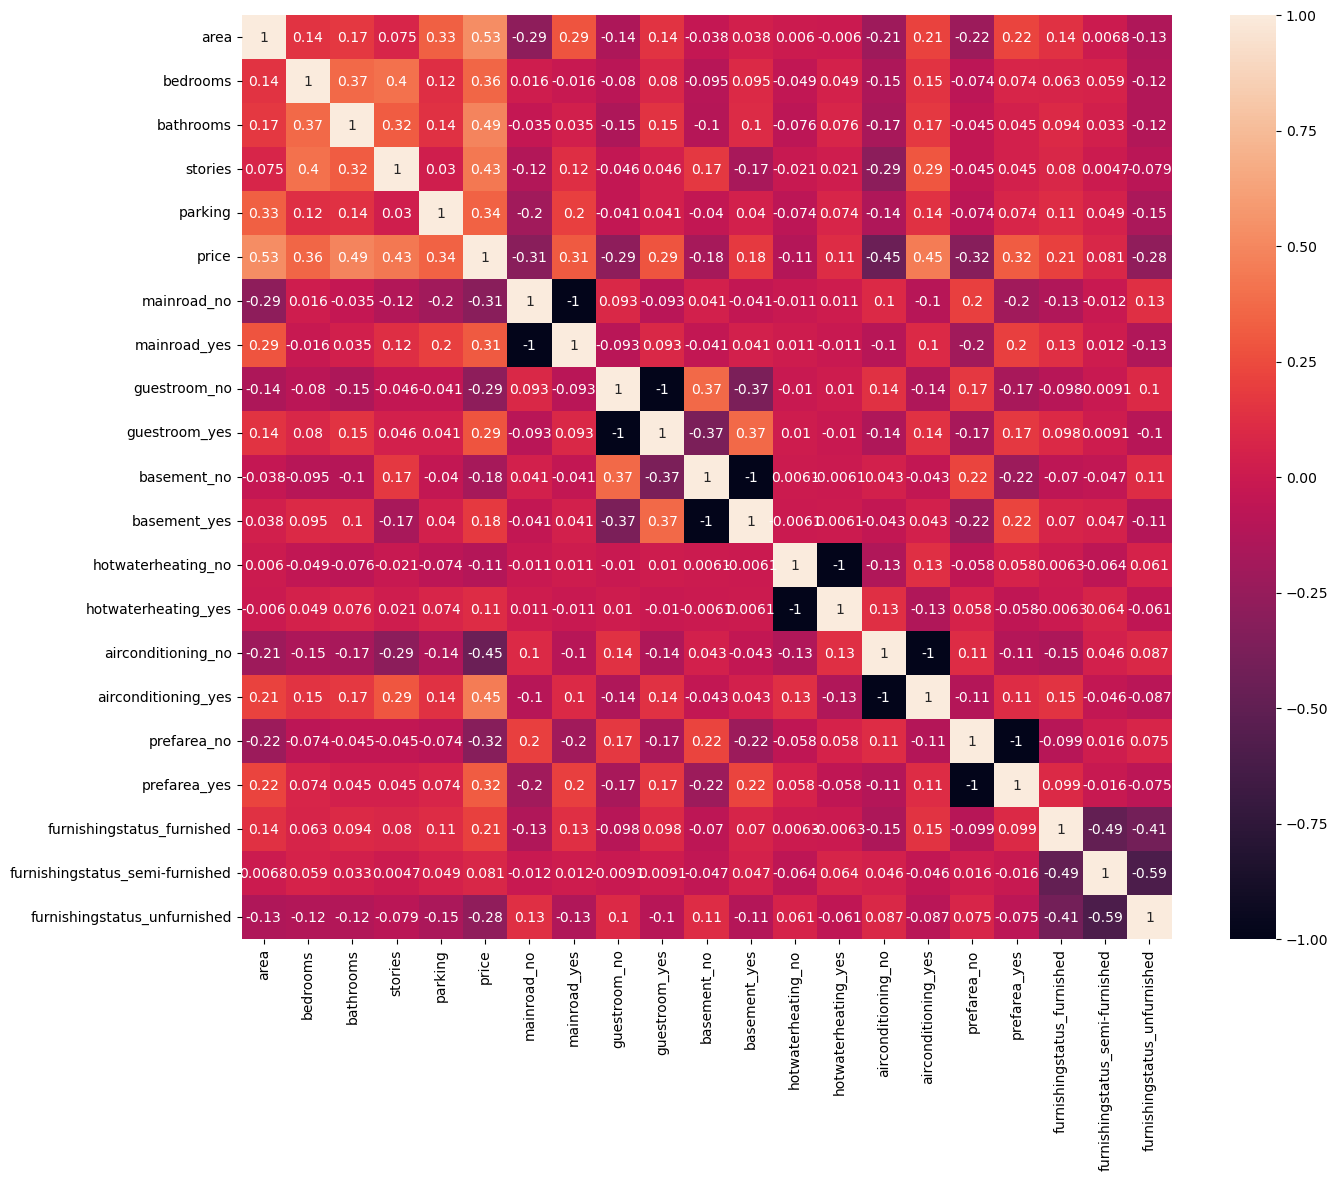

In [32]:
plt.figure(figsize=[15,12])
sns.heatmap(data=df1.corr(),annot=True)
plt.show()

In [33]:
X = df1.drop(['price'], axis='columns')
y = df1['price']

In [34]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8580,4,3,4,2,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
1,16200,5,3,2,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
2,8100,4,1,2,2,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0
3,5750,3,2,4,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1
4,13200,3,1,2,2,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0


In [35]:
y

0      10150000
1      10150000
2       9870000
3       9800000
4       9800000
         ...   
534     1820000
535     1767150
536     1750000
537     1750000
538     1750000
Name: price, Length: 539, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [38]:
lr.score(X_train, y_train) , lr.score(X_test, y_test)

(0.6597586604103237, 0.7235437704537415)

In [39]:
mean_squared_error(y_test,lr.predict(X_test)*100 )

2.4346654297659782e+17

In [40]:
y_pred =lr.predict(X_test)
print('perdicted value is',y_pred )

perdicted value is [3517740.89339762 6800206.01916954 4639273.06304842 6954809.59360686
 3374545.33367094 6704529.80060675 3222539.61623594 3297229.35090992
 6201713.91855464 2916850.04249843 6815801.39128963 4115183.57697142
 4702396.16887477 5830267.76694828 5021434.97292421 4245134.1384586
 3790157.17398001 5194295.31109873 4479433.81507111 5252377.27162702
 2856230.26930162 3444931.82731404 4286227.92501476 3994716.17924663
 4836569.53564901 7167654.89337817 4214387.83959055 3709986.4850135
 7217999.95383784 3064266.8736763  5511279.96711547 4213799.4646999
 3438329.75059206 4539987.91369991 2829843.81736365 2825615.89338011
 4287135.70214164 6137447.769798   3181240.44538066 3854732.16546373
 5915314.28276377 3288549.25630629 3074840.88609357 4496864.17309205
 4179061.15416251 6875029.60394989 5135971.17551424 4041530.41505365
 5164671.77644763 7368968.85740182 2874096.99519298 3493111.64363624
 4642862.17237828 4786536.34167964 3048067.01379079 4903752.02900555
 5436566.15908411 

In [41]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)


C:\Users\Sakil Middya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
lg.score(X_train,y_train), lg.score(X_test, y_test)

(0.08120649651972157, 0.018518518518518517)

In [43]:
mean_squared_error(y_test,lg.predict(X_test)*100 )

1.903035158262778e+17

In [44]:
y_pred=lg.predict(X_test)

In [45]:
y_pred

array([4200000, 5600000, 5250000, 5600000, 3500000, 5600000, 3500000,
       3500000, 4200000, 3500000, 5600000, 3500000, 4200000, 4200000,
       3500000, 3500000, 3500000, 5600000, 4900000, 5250000, 3500000,
       3500000, 3500000, 4200000, 4900000, 5950000, 4200000, 3500000,
       5600000, 3500000, 3500000, 3500000, 3500000, 3500000, 3500000,
       3500000, 5250000, 5950000, 3500000, 3500000, 5950000, 3500000,
       3500000, 4900000, 3500000, 5600000, 3500000, 3500000, 4200000,
       5600000, 3500000, 3500000, 3500000, 3500000, 4200000, 5250000,
       5950000, 3500000, 5250000, 4200000, 3500000, 3500000, 5250000,
       3500000, 5600000, 4200000, 3500000, 3500000, 3500000, 3500000,
       3500000, 4900000, 4900000, 3500000, 3500000, 5950000, 5250000,
       4900000, 3500000, 5250000, 3500000, 3500000, 3500000, 5250000,
       5600000, 5600000, 3500000, 5600000, 3500000, 5250000, 4900000,
       4200000, 4200000, 4200000, 5250000, 3500000, 3500000, 5250000,
       3500000, 5600

In [46]:
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
print(accuracy_score(y_test,y_pred))

0.018518518518518517


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         2
     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         1
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         2
     2485000       0.00      0.00      0.00         1
     2653000       0.00      0.00      0.00         1
     2660000       0.00      0.00      0.00         1
     2800000       0.00      0.00      0.00         1
     2835000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         2
     2940000       0.00      0.00      0.00         2
     3010000       0.00      0.00      0.00         1
     3080000       0.00      0.00      0.00         2
     3150000       0.00      0.00      0.00         2
     3255000       0.00      0.00      0.00         1
     3290000       0.00    

C:\Users\Sakil Middya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sakil Middya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sakil Middya\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [48]:
Rf=RandomForestRegressor()
Rf.fit(X_train,y_train)
Rf.score(X_train,y_train)*100 , Rf.score(X_test,y_test)*100

(94.03083836494686, 67.11087407775874)

In [49]:
mean_squared_error(y_test,Rf.predict(X_test)*100 )

2.4031528456313894e+17

In [50]:
y_pred=Rf.predict(X_test)

In [51]:
y_pred

array([4097730.        , 6515670.        , 4593400.        ,
       6949110.        , 3994970.        , 6356700.        ,
       3115688.33333333, 3646370.        , 4805535.        ,
       3321535.        , 7750604.4       , 4414410.        ,
       3889445.        , 5057290.        , 4557840.        ,
       5011965.        , 3608150.        , 6135990.        ,
       4857300.        , 4998140.        , 2459030.        ,
       3605070.        , 3525865.        , 4768575.        ,
       4814670.        , 6714750.        , 3933078.33333333,
       4162690.        , 7866355.        , 3178980.        ,
       6548634.4       , 3355852.5       , 3648295.        ,
       3936135.        , 2976913.33333333, 2473100.        ,
       3837050.        , 5670245.        , 3331510.        ,
       3124870.        , 6268290.        , 3609060.        ,
       3057250.        , 4201050.        , 3721130.        ,
       6701479.4       , 5240060.        , 4198530.        ,
       4661160.        ,

In [52]:
Dt=DecisionTreeRegressor()
Dt.fit(X_train,y_train)
Dt.score(X_train,y_train)*100 , Dt.score(X_test,y_test)*100

(99.91180891988523, 20.35140643416854)

In [53]:
mean_squared_error(y_test,Dt.predict(X_test)*100 )

2.5824470901146294e+17

In [54]:
y_pred=Dt.predict(X_test)

In [55]:
y_pred

array([7455000., 6195000., 4480000., 6195000., 5110000., 5775000.,
       3115000., 3850000., 4025000., 3423000., 8295000., 4060000.,
       3150000., 4025000., 5950000., 4830000., 3325000., 6510000.,
       6020000., 4760000., 2135000., 7455000., 4473000., 4200000.,
       4900000., 5320000., 4620000., 2940000., 8540000., 3500000.,
       9240000., 4375000., 3395000., 3920000., 2957500., 2957500.,
       3780000., 5565000., 3290000., 2730000., 5950000., 3570000.,
       2450000., 3990000., 3675000., 6195000., 5810000., 4060000.,
       3640000., 5950000., 3850000., 3220000., 5803000., 3920000.,
       3500000., 5250000., 5229000., 3675000., 6930000., 3640000.,
       8890000., 2310000., 5285000., 7455000., 6650000., 3010000.,
       3500000., 3353000., 4340000., 3115000., 4025000., 4382000.,
       4900000., 6160000., 8750000., 7875000., 5600000., 4900000.,
       2590000., 3850000., 2450000., 7560000., 4200000., 5215000.,
       7245000., 7980000., 4165000., 5005000., 3850000., 53200

# Final Prediction

In [56]:
Dt.predict([[8580,4,3,4,2,10150000,0,1,1,0,0,1,0,0,1,0,1,0,1,0]])


C:\Users\Sakil Middya\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7245000.])